In [1]:
import pandas as pd

# mac address 處理, 不刪除任何資料

In [ ]:
# ignore 2

In [6]:
# ignore 3

In [ ]:
# ignore 4

In [ ]:
# ignore 5

In [ ]:
# ignore 6

In [ ]:
# ignore 7

In [ ]:
# ignore 8

In [ ]:
# ignore 9

##  設定輸入資料路徑

In [2]:
csvDataFile="D:/fuming.Tsai/Documents/FuBon/working_directory/migo/PoC/amigo.csv"

In [3]:
############## process amigo.csv ####################
import pandas as pd

#csvDataFile="D:/fuming.Tsai/Documents/FuBon/working_directory/migo/PoC/simpleTest.csv"
df1=pd.read_csv(csvDataFile, encoding='big5')

In [4]:

len(df1) # total num of wifi sinal

261924

## 看看輸入資料長相

In [5]:
df1[:10]

,Sequence,Type,Sub-type,Time,Source,Destination,SSID,Signal
0,6,0,8,2017-10-11 08:23:17.660969,6c198fb03611,ffffffffffff,CHT Wi-Fi(HiNet),-128
1,11,0,8,2017-10-11 08:23:17.664555,6c198fb03613,ffffffffffff,.1.Free Wi-Fi,-128
2,20,0,8,2017-10-11 08:23:17.665097,3e91489bafbd,ffffffffffff,D-Link_612,-121
3,21,0,8,2017-10-11 08:23:17.665097,3e91489bafbd,ffffffffffff,D-Link_612,-256
4,26,0,4,2017-10-11 08:23:17.674797,9c5cf91fce54,ffffffffffff,NaN,-256
5,27,0,0,2017-10-11 08:23:17.674829,1e2001002302,06545720010d,NaN,-256
6,80,0,4,2017-10-11 08:23:17.676843,9c5cf91fce54,ffffffffffff,NaN,-256
7,81,0,0,2017-10-11 08:23:17.676877,1e2001002302,06545720010d,NaN,-256
8,98,0,0,2017-10-11 08:23:17.677385,1e2001002302,06545720010d,NaN,-256
9,116,0,0,2017-10-11 08:23:17.677897,1e2001002302,06545720010d,NaN,-256


In [6]:
df2=df1.copy()
del df2['SSID'] # remove unecessary column - SSID/Type/Sub-Type/Sequence
del df2['Type']
del df2['Sub-type']
del df2['Signal']
del df2['Sequence']

In [7]:
len(df2) # total num of possible signal from mobile device
df2=df2[df2['Destination']=='ffffffffffff']
del df2['Destination']
df2.head()

,Time,Source
0,2017-10-11 08:23:17.660969,6c198fb03611
1,2017-10-11 08:23:17.664555,6c198fb03613
2,2017-10-11 08:23:17.665097,3e91489bafbd
3,2017-10-11 08:23:17.665097,3e91489bafbd
4,2017-10-11 08:23:17.674797,9c5cf91fce54


In [8]:
df2['Time']=df2['Time'].str.slice(stop=16) # reduce time complexity
df2.head() # check the data

,Time,Source
0,2017-10-11 08:23,6c198fb03611
1,2017-10-11 08:23,6c198fb03613
2,2017-10-11 08:23,3e91489bafbd
3,2017-10-11 08:23,3e91489bafbd
4,2017-10-11 08:23,9c5cf91fce54


In [9]:
df2=df2.drop_duplicates()# drop duplicate data
df2.head()
len(df2)

14124

In [10]:
df2.head()

,Time,Source
0,2017-10-11 08:23,6c198fb03611
1,2017-10-11 08:23,6c198fb03613
2,2017-10-11 08:23,3e91489bafbd
4,2017-10-11 08:23,9c5cf91fce54
22,2017-10-11 08:23,f6f6552b40c4


In [11]:
df2 = df2.set_index(df2['Time'],drop=True) # 設定index, 丟棄原本index
del df2['Time'] # delete df['dt']

In [12]:
df2.head()

,Source
Time,
2017-10-11 08:23,6c198fb03611
2017-10-11 08:23,6c198fb03613
2017-10-11 08:23,3e91489bafbd
2017-10-11 08:23,9c5cf91fce54
2017-10-11 08:23,f6f6552b40c4


In [13]:
df2.index= pd.to_datetime(df2.index,format='%Y-%m-%d %H:%M') # 轉換成 DatetimeIndex
df2.head()

,Source
Time,
2017-10-11 08:23:00,6c198fb03611
2017-10-11 08:23:00,6c198fb03613
2017-10-11 08:23:00,3e91489bafbd
2017-10-11 08:23:00,9c5cf91fce54
2017-10-11 08:23:00,f6f6552b40c4


In [14]:
# just a simple check if some mac happens in timeslot
#g=df2.loc['2017-10-11 08:23:00']
#g.loc[g['Source']=='f6f6552b40c4'].size # mac address exists

#g.loc[g['Source']=='f6f6552b4s0c4'].size # mac address does not exist


# get a series data in value
#g.loc['2017-10-11 08:23:00'].values


##

In [78]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [79]:
df2.to_csv(csvDataFile+".tmp")
from datetime import timedelta
from datetime import datetime

In [25]:
#allContent=''

#with open(csvDataFile+".tmp", 'r') as f:
#    allContent=f.read()

#allContentArr=allContent.split('\n')

#timeWindow=10 # 10 minutes

#def convertTime(currTime, slot=10):
    #print(currTime)
#    tmpTime=datetime.strptime(currTime, '%Y-%m-%d %H:%M:%S')
#    targetTime=tmpTime+timedelta(minutes=slot)
#    return targetTime.strftime('%Y-%m-%d %H:%M:%S')

#def appendTime(statement, slot=10):
#    resultSet=set()
#    currTime=statement.split(',')[0]
#    tmpTime=datetime.strptime(currTime, '%Y-%m-%d %H:%M:%S')
#    resultSet.add(statement)
#    for t in range((1+slot)):
#        targetTime=tmpTime+timedelta(minutes=t)
#        statementResult=targetTime.strftime('%Y-%m-%d %H:%M:%S')+","+statement.split(',')[1]
#        resultSet.add(statementResult)
#    return resultSet

#resultSet=set()
#for a in allContentArr:
#    if a.find('Time') < 0 and len(a)>0:
#        t=convertTime(a.split(',')[0], timeWindow)
#        targetStatement=t+","+a.split(',')[1]
#        if allContent.find(targetStatement)>=0:
#            resultSet=resultSet.union(appendTime(a, timeWindow))
    
#outFile=open(csvDataFile+".tmp2", 'w')
#for t in resultSet:
#    outFile.write(t+"\n")

#len(resultSet)
#df2.head()
#df3.head()

,Time,Mac Address
0,2017-10-11 08:23:00,6c198fb03611
1,2017-10-11 08:23:00,6c198fb03613
2,2017-10-11 08:23:00,3e91489bafbd
3,2017-10-11 08:23:00,9c5cf91fce54
4,2017-10-11 08:23:00,f6f6552b40c4


for i in resultArr:
    resultArr.append

In [80]:
#column_names = ['Time','Mac Address']
df3=pd.read_csv(csvDataFile+".tmp", encoding='big5')
df3.columns=['Time','Mac Address']

In [81]:
df3=df3.sort_values('Time')
#df3 = df3.set_index(df3['Time'],drop=True) # 設定index, 丟棄原本index
#del df3['Time'] # delete df['dt']
df3=df3.reset_index(drop=True)

In [82]:
df3.to_csv('D:/fuming.Tsai/Documents/FuBon/working_directory/migo/PoC/amigo_stage3.csv')

In [83]:
df3[:5]

,Time,Mac Address
0,2017-10-11 08:23:00,6c198fb03611
1,2017-10-11 08:23:00,784476ff0000
2,2017-10-11 08:23:00,807abf572229
3,2017-10-11 08:23:00,8cf5a3f4ff8c
4,2017-10-11 08:23:00,5c70a3264915


## 在分行存在的 MAC 時間分析

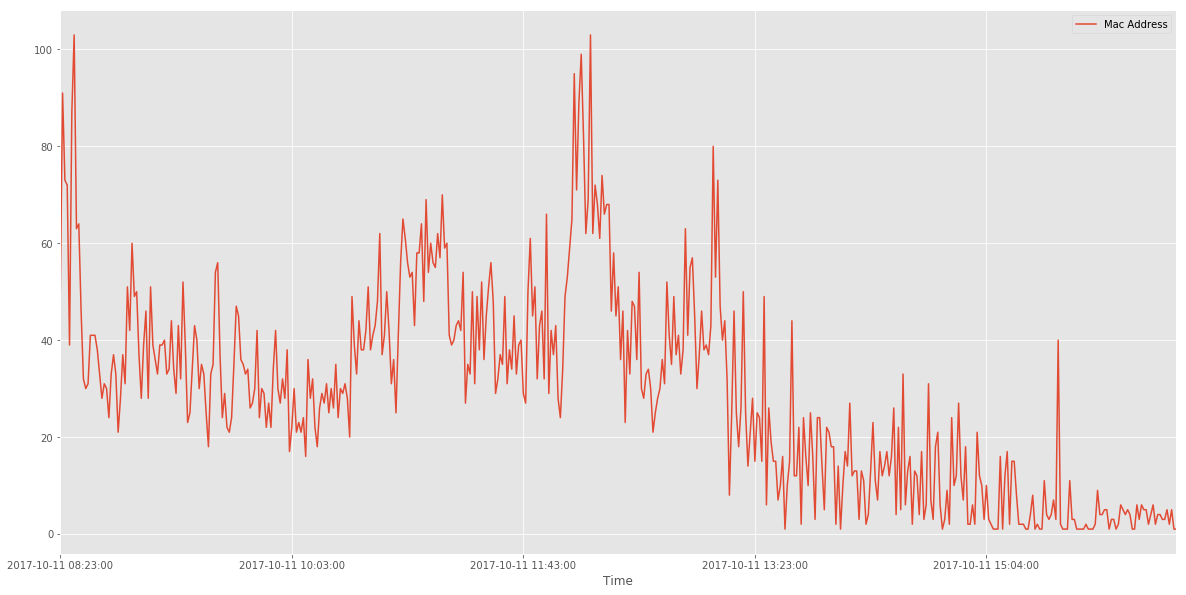

In [84]:
# plot some simple graph
df4=(df3.groupby(['Time']).count())

#x=list(df4.index)
#y=list(df4['Mac Address'])



df4.plot(kind='line', figsize=(20,10))

#df4['Mac Address']

#x = df4.index.all
#y = df4['Mac Address']#[123,432,823,192,12]

#plt.plot(x,y)
#plt.show()

#df4.plot( y='Mac Address', use_index=True)


import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
df4.plot(kind='line',figsize=(40,10)) # how many mac address in each minute

## Mac 待在分行的時間分析 ##

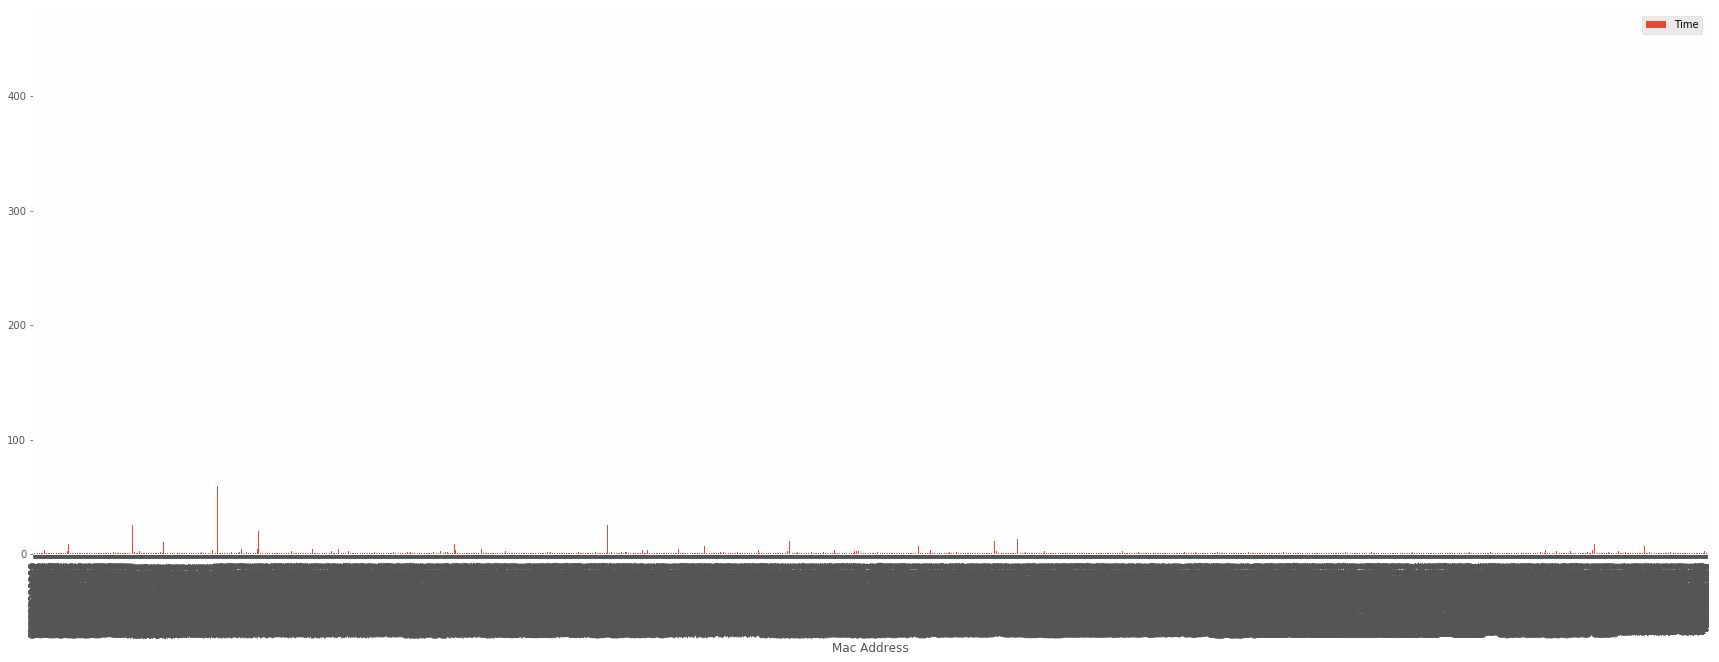

In [86]:
# how much time for each mac stay 
df4=(df3.groupby(['Mac Address']).count())
df4.plot(kind='bar',figsize=(30,10)) # how many mac address in each minute

### 移除時間待過久的 MAC (移除待超過 60 mins 的 MAC)

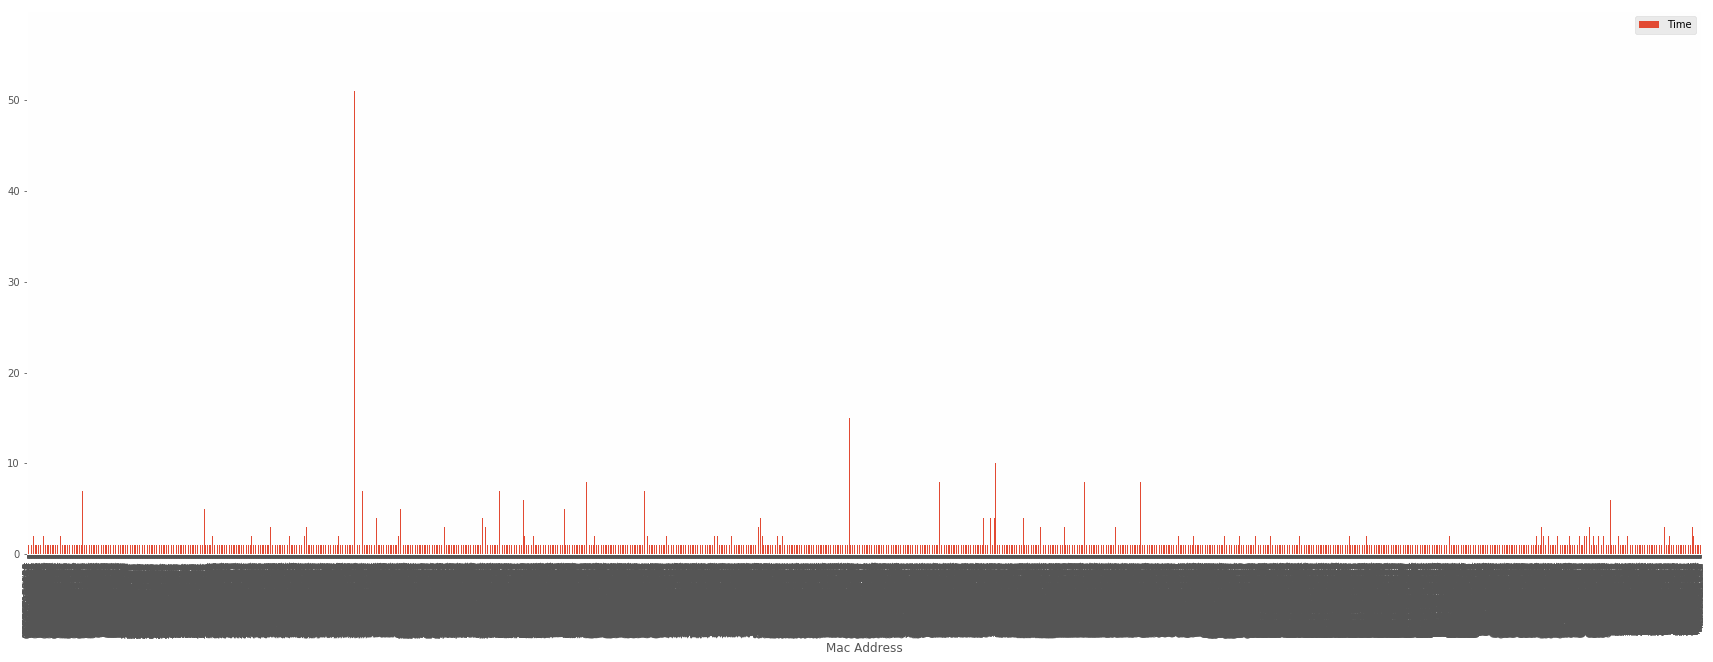

In [87]:
df5=df4[df4['Time']<60] # 60 minutes: threshold
df5.plot(kind='bar',figsize=(30,10)) # how many mac address in each minute

In [88]:
x=list(df5['Time'])
df6=pd.DataFrame({'x':x, 'count':0})
df6.head()


,count,x
0,0,1
1,0,1
2,0,7
3,0,1
4,0,1


In [89]:
df7=df6.groupby('x').count()
df7.head()

,count
x,
1,8100
2,532
3,156
4,79
5,39


### 看看小於 60 分鐘的 MAC, 大概多少人待多久分鐘

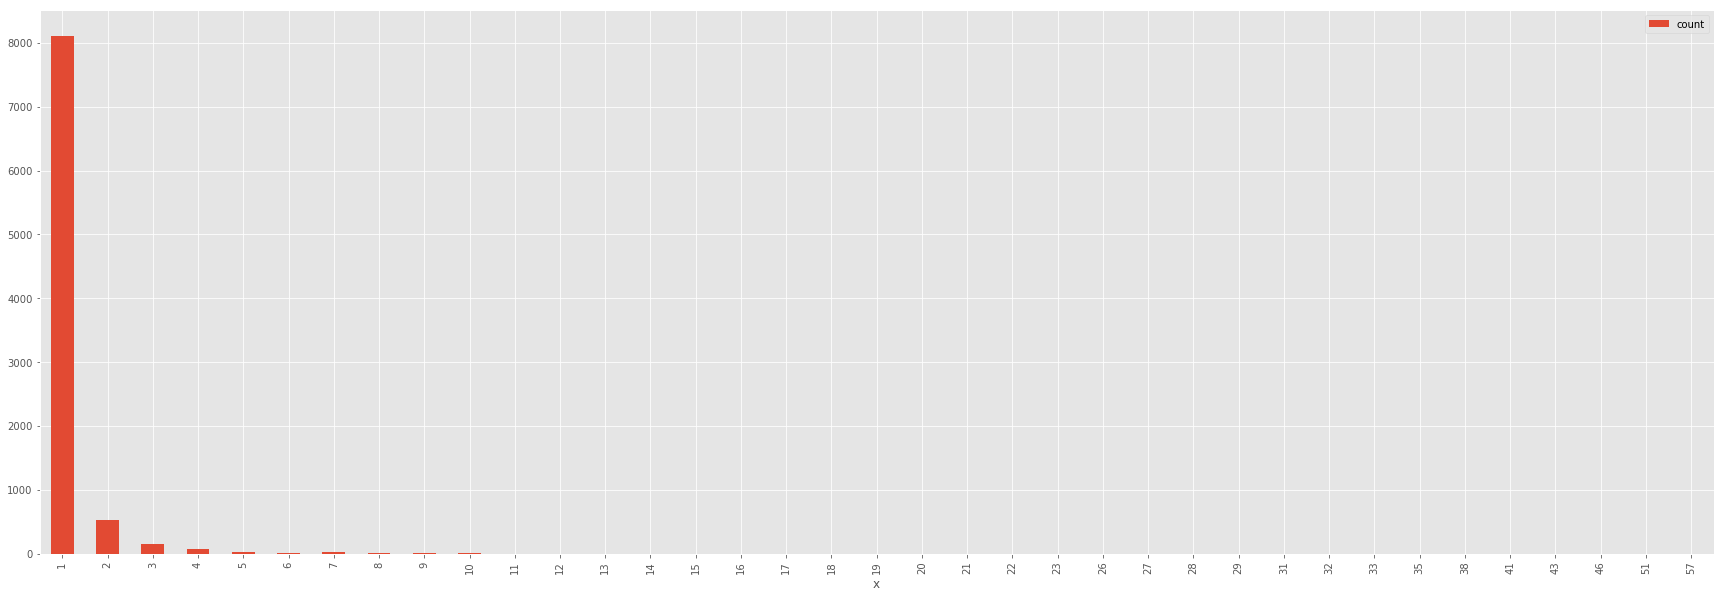

In [90]:
df7.plot(kind='bar',figsize=(30,10)) # how many mac address in each minute

## 移除只待 5 分鐘以下的 Mac Address

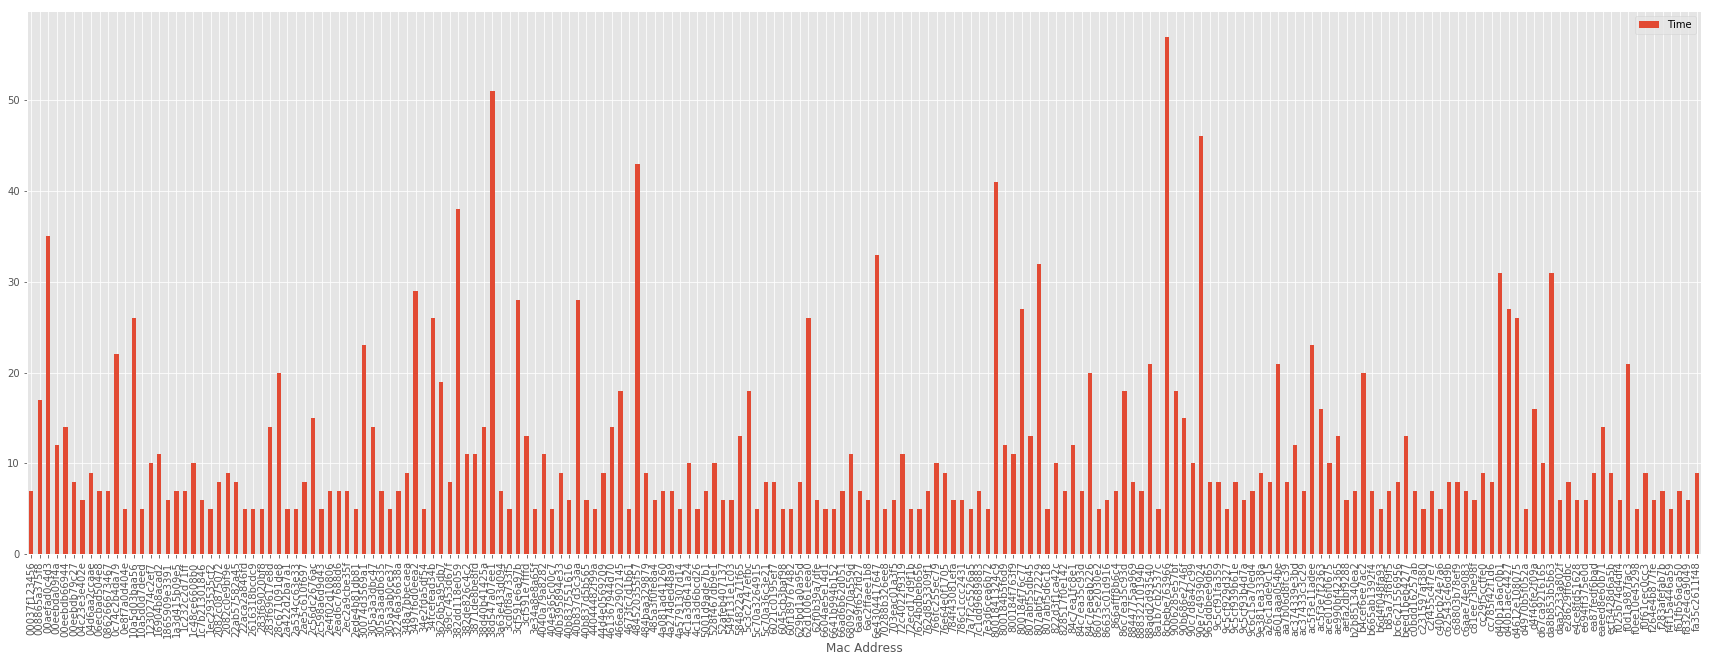

In [94]:
df6=df5[df5['Time']>=5] # 5 minutes: threshold
df6.plot(kind='bar',figsize=(30,10)) # how many mac address in each minute

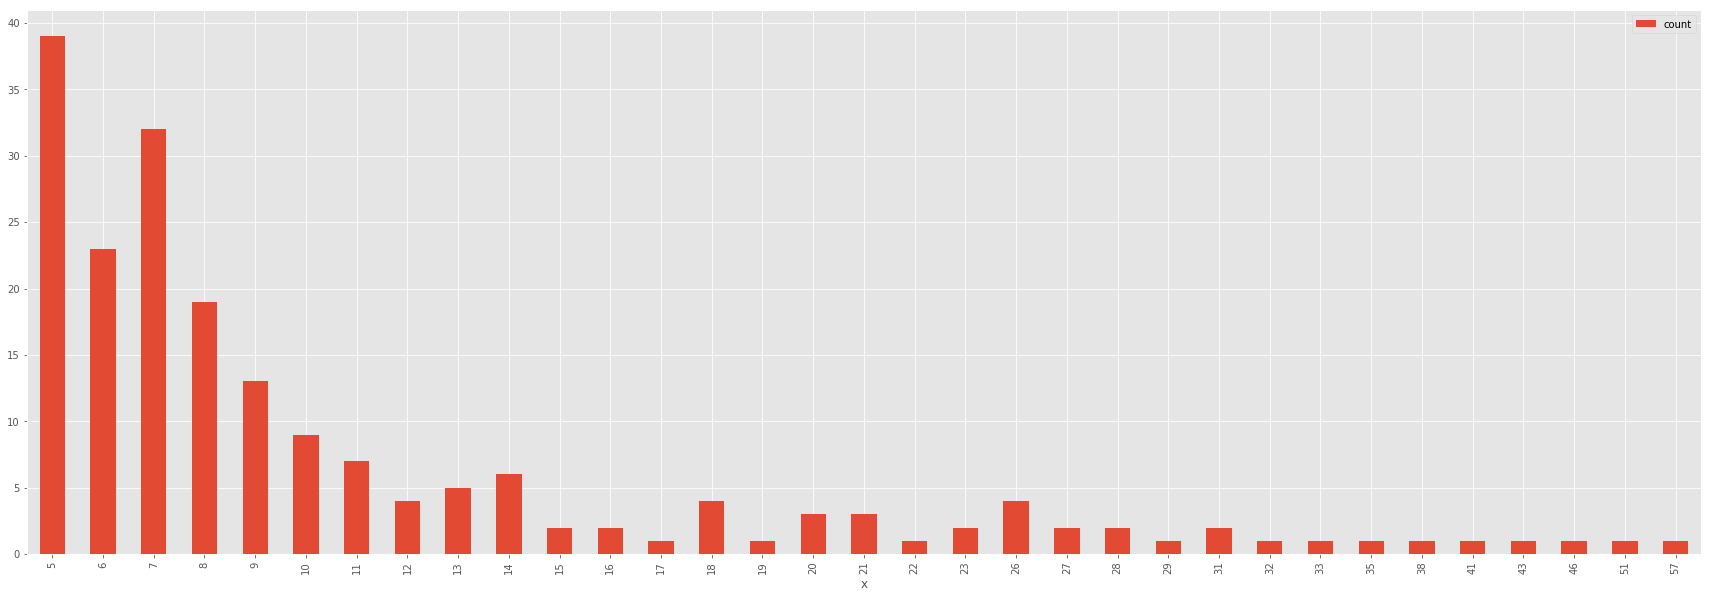

In [95]:
x=list(df6['Time'])
df7=pd.DataFrame({'x':x, 'count':0})
df8=df7.groupby('x').count()
df8.plot(kind='bar',figsize=(30,10)) # how many mac address in each minute

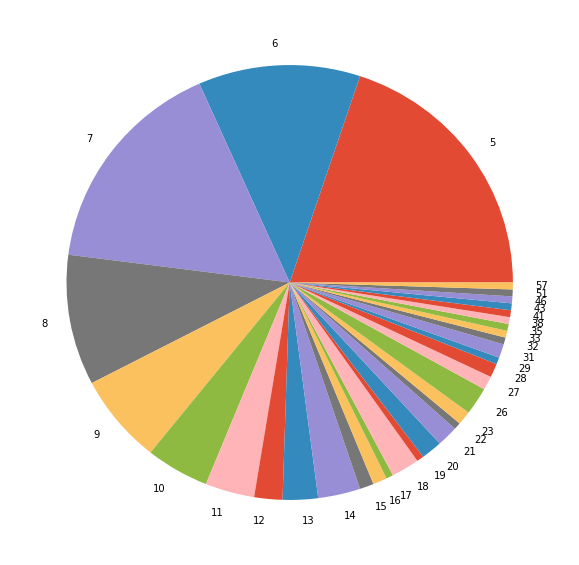

In [96]:
#df7.plot(kind='pie',y=df7['count'], figsize=(30,10))# how many mac address in each minute
#df7.describe()
#df7.head()
#df7.index
labels = df8.index #['A','B','C','D','E','F','G']
y = df8['count'] #[123,432,823,192,12,83,291]

plt.figure(figsize=(10,10)) # 圖的長及寬
plt.pie(y,labels=labels)
plt.show()

In [97]:
#labels = df7.index #['A','B','C','D','E','F','G']
#y = df7['count'] #[123,432,823,192,12,83,291]

df9=df8[df8.index>13]
df10=df8[df8.index<=13]
sum(df9['count']) # num of people ( <=12 minutes )

45

### 待在分行介於 10 至 13 分鐘的人數可以說是來分行辦事的人數約為一半

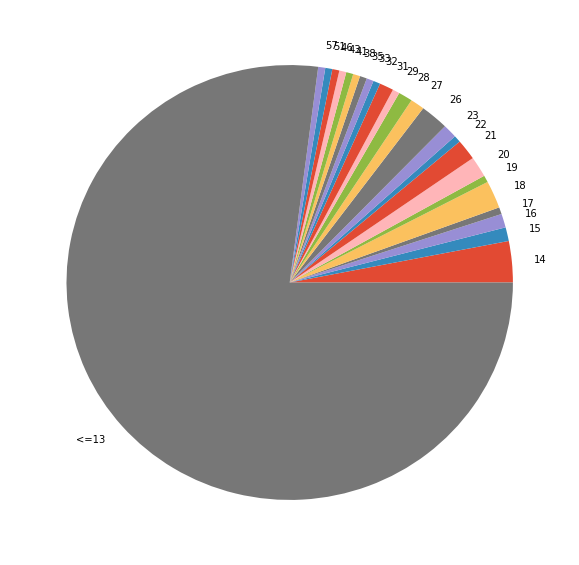

In [98]:
newLabels=[]
for n in df9.index:
    newLabels.append(str(n))
newLabels.append('<=13')

newValues=[]
for n in df9.values:
    newValues.append(n)
newValues.append(sum(df10['count']))

plt.figure(figsize=(10,10)) # 圖的長及寬
plt.pie(newValues,labels=newLabels)
plt.show()

In [102]:
df3.head()

,Time,Mac Address
0,2017-10-11 08:23:00,6c198fb03611
1,2017-10-11 08:23:00,784476ff0000
2,2017-10-11 08:23:00,807abf572229
3,2017-10-11 08:23:00,8cf5a3f4ff8c
4,2017-10-11 08:23:00,5c70a3264915
